Cluster 0, Drone 1, Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 56, 55, 51, 18, 15, 62, 21, 23, 22, 63, 50, 74, 53, 54, 65, 66, 64, 26, 25, 24, 75, 1]
Cluster 1, Drone 2, Route: [1, 19, 60, 61, 20, 17, 8, 16, 14, 59, 11, 9, 57, 58, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 69, 67, 68, 72, 73, 71, 48, 38, 49, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2]

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    Total distance: 108.70 km
    Est. flight time: 60.39 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H53 -> H52 -> H48 -> H15 -> H12 -> H59 -> H18 -> H20

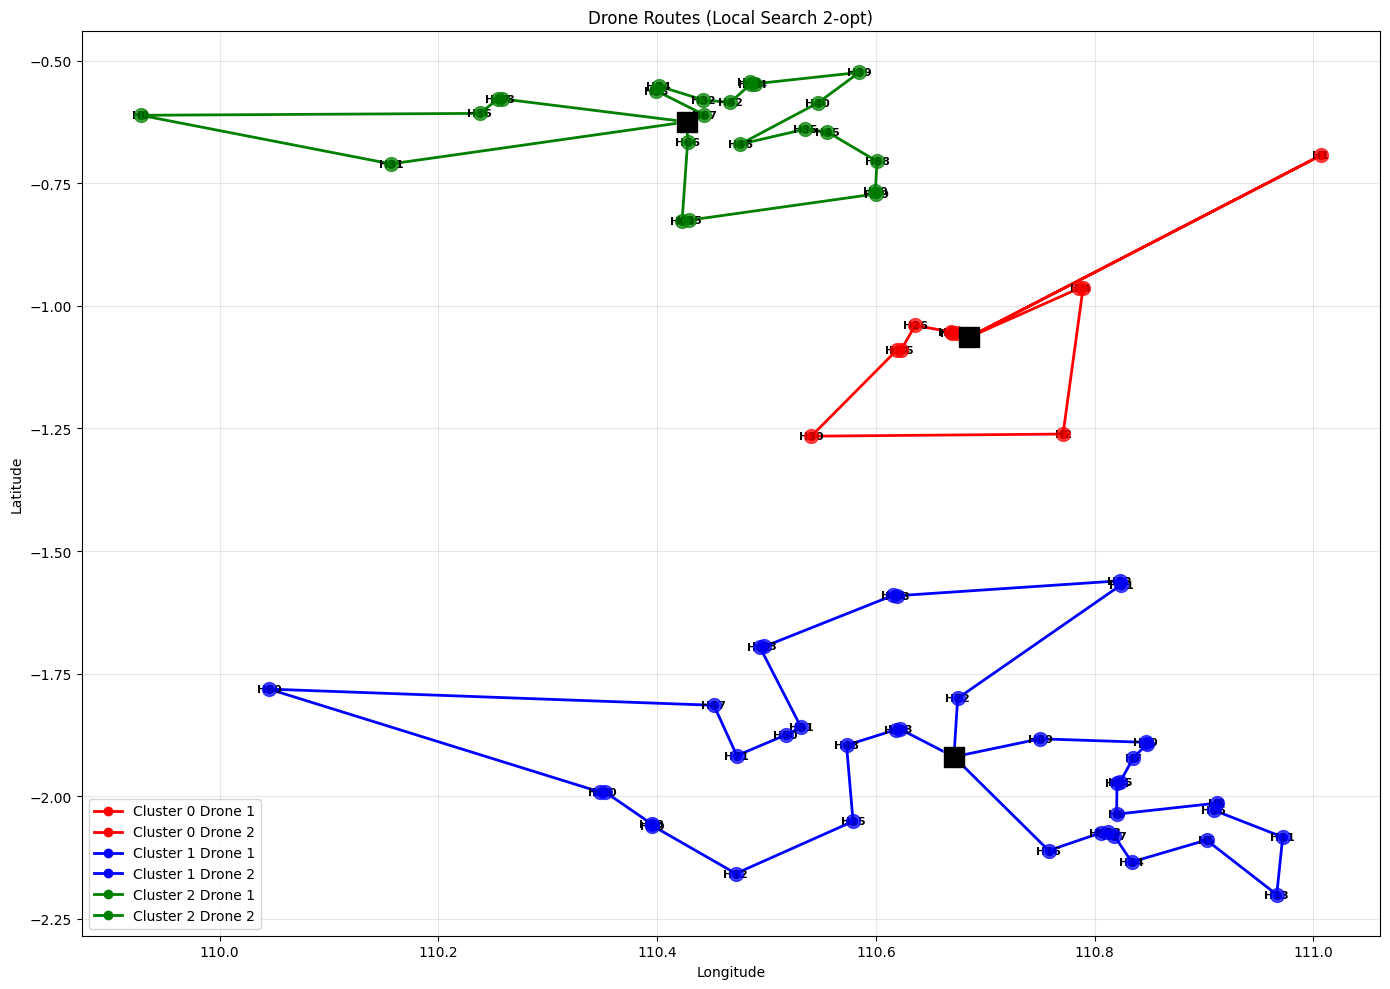

In [2]:
from ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes = routing.optimize_all_clusters()
routing.print_cluster_routes(routes)
routing.visualize_cluster_routes(routes)

Hyperparameter Tuning

In [ ]:
import optuna
from ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

def objective(trial):
    #Define hyperparameters for Bayesian optimization
    max_iterations = trial.suggest_int("max_iterations", 100, 2000)
    step_size = trial.suggest_float("step_size", 0.01, 1.0, log=True)
    n_restarts = trial.suggest_int("n_restarts", 1, 5)
    neighbor_swap_rate = trial.suggest_float("neighbor_swap_rate", 0.1, 0.5)

    #Initialize the routing class
    routing = ClusterBasedDroneRouting_LocalSearch(
        csv_file="ketapang-12-08-24_merged_clustered_3.csv",
        road_points=road_points,
        n_drones={0: 2, 1: 2, 2: 2}
    )

    #Optimize using the trial hyperparameters
    routes = routing.optimize_all_clusters_bayesian(
        max_iterations=max_iterations,
        step_size=step_size,
        n_restarts=n_restarts,
        neighbor_swap_rate=neighbor_swap_rate
    )

    #Compute total distance
    total_distance = 0
    for cluster_id, route_list in routes.items():
        for route in route_list:
            if len(route) < 2:
                continue
            for i in range(len(route) - 1):
                total_distance += routing.dist_matrix[route[i]][route[i + 1]]

    return total_distance 
    
# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=2000, show_progress_bar=True)

# Print best result
print("Best hyperparameters:", study.best_params)
print("Best total distance:", study.best_value)

Cluster 0, Drone 1, Route: [0, 6, 7, 5, 33, 27, 28, 29, 32, 30, 31, 0]
Cluster 0, Drone 2, Route: [0, 4, 0]
Cluster 1, Drone 1, Route: [1, 56, 55, 51, 18, 15, 62, 21, 23, 22, 63, 50, 74, 53, 54, 65, 66, 64, 26, 25, 24, 75, 1]
Cluster 1, Drone 2, Route: [1, 9, 20, 61, 60, 19, 17, 16, 14, 8, 59, 11, 57, 58, 10, 12, 13, 52, 1]
Cluster 2, Drone 1, Route: [2, 34, 3, 39, 40, 41, 2]
Cluster 2, Drone 2, Route: [2, 69, 49, 67, 68, 72, 73, 71, 48, 38, 43, 42, 47, 44, 46, 45, 35, 37, 36, 70, 2]

=== DRONE ROUTES (Local Search) ===

Cluster 0 (Drones: 2):
  Start from road point: (-1.06412, 110.68526)
  Drone 1 Route: R0 -> H3 -> H4 -> H2 -> H30 -> H24 -> H25 -> H26 -> H29 -> H27 -> H28 -> R0
    Total distance: 108.70 km
    Est. flight time: 60.39 minutes
  Drone 2 Route: R0 -> H1 -> R0
    Total distance: 109.19 km
    Est. flight time: 60.66 minutes

Cluster 1 (Drones: 2):
  Start from road point: (-1.91950, 110.67141)
  Drone 1 Route: R1 -> H53 -> H52 -> H48 -> H15 -> H12 -> H59 -> H18 -> H20

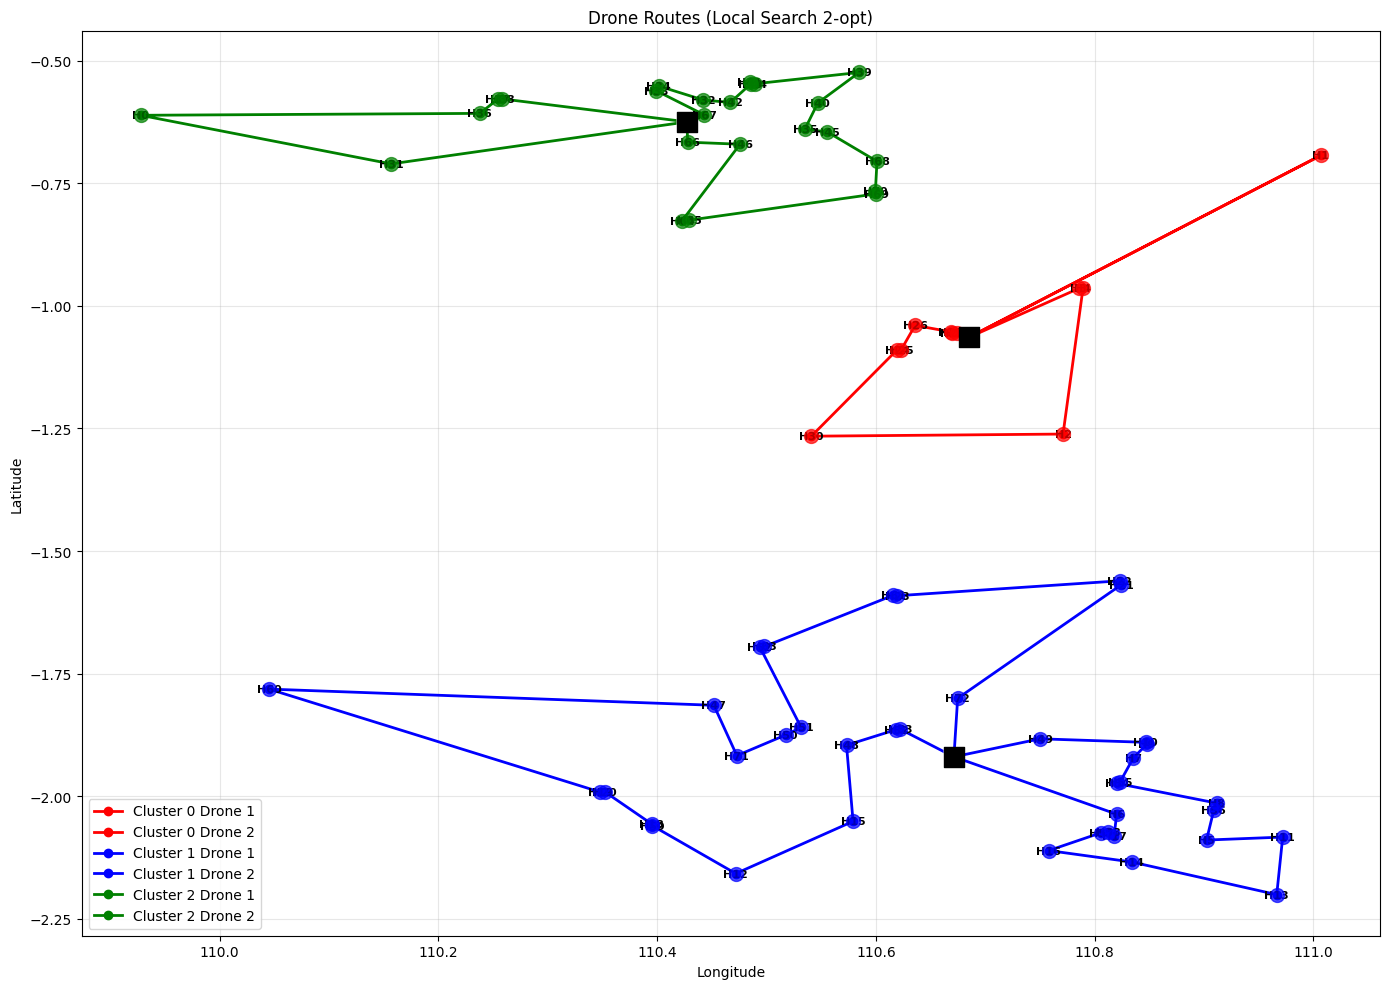

In [1]:
from ls import *

road_points = {
    0: (-1.064124, 110.685258),   
    1: (-1.919500, 110.671412),  
    2: (-0.625036, 110.427354)
}

#Initialize the routing class
routing = ClusterBasedDroneRouting_LocalSearch(
    csv_file="ketapang-12-08-24_merged_clustered_3.csv",
    road_points=road_points,
    n_drones={0: 2, 1: 2, 2: 2}
)

routes_opt = routing.optimize_all_clusters_bayesian(
        max_iterations=877,
        step_size=0.01950746499195542,
        n_restarts=1,
        neighbor_swap_rate=0.20075979014470136
    )

routing.print_cluster_routes(routes_opt)
routing.visualize_cluster_routes(routes_opt)